In [23]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [20]:
ht_weight_df = pd.read_csv(r'C:\Users\danah\HeightWeightRegression\HeightWeight_Regression.csv')
ht_weight_df.shape #number of rows & columns
ht_weight_df.describe() #stats view of the dataframe

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


Text(0.5, 1.0, 'Height vs Weight')

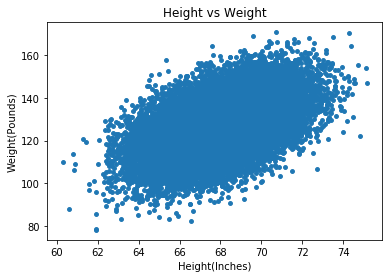

In [21]:
ht_weight_df.plot(kind="scatter", x='Height(Inches)', y='Weight(Pounds)', s=15) #option 1 for scatter plot
plt.title('Height vs Weight')

Text(0.5, 1.0, 'Height vs Weight')

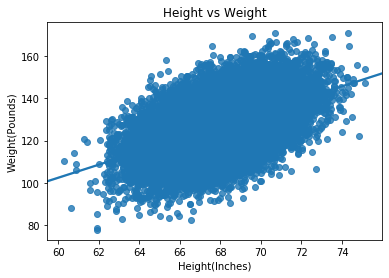

In [25]:
ax = sns.regplot(x='Height(Inches)', y='Weight(Pounds)', data=ht_weight_df, scatter=True) #option 2 for scatter plot -- this one is better
ax.set_title('Height vs Weight')

Will be predicting the Weight of an individual based on their height, so we must split the dataset accordingly

In [28]:
X = ht_weight_df['Height(Inches)'].values.reshape(-1,1)
Y = ht_weight_df['Weight(Pounds)'].values.reshape(-1,1)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#To retrieve the intercept: 
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-81.11447644]
[[3.06281405]]


In [32]:
y_pred = regressor.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,134.2032,123.335498
1,141.6617,134.006128
2,111.6239,124.676674
3,118.2317,124.371158
4,102.6027,113.844542
...,...,...
4995,135.6229,128.668960
4996,150.5815,125.910161
4997,133.2004,125.680633
4998,159.9584,130.432375


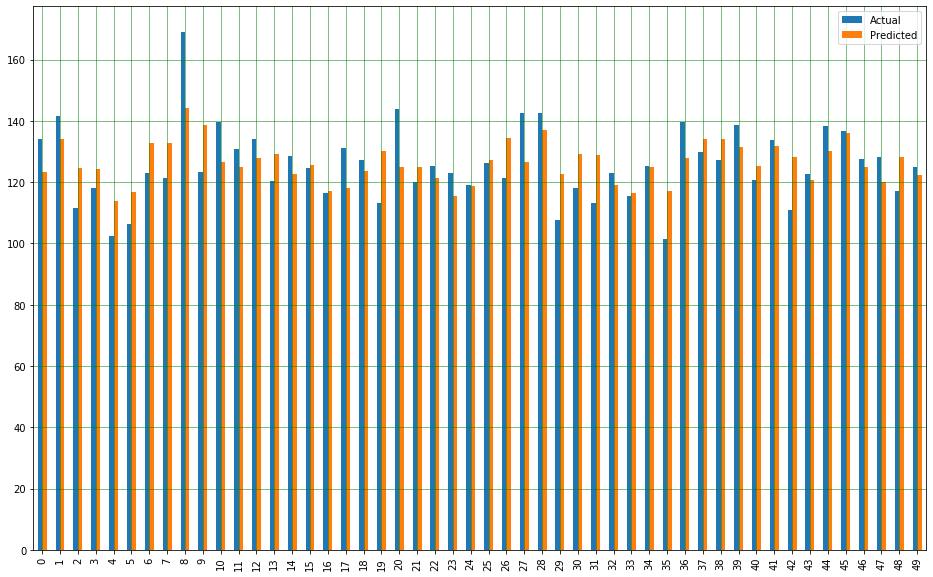

In [35]:
df1 = df.head(50)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

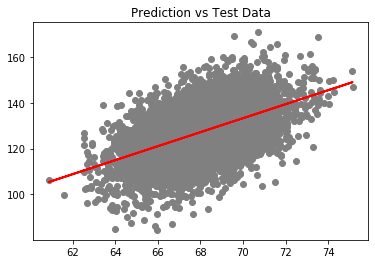

In [38]:
plt.scatter(X_test, Y_test, color="gray")
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Prediction vs Test Data')
plt.show()

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 8.187041886060046
Mean Squared Error: 105.05298919282606
Root Mean Squared Error: 10.249536047686552


### Try with the Reverse Situation

In [44]:
x_pred = regressor.predict(Y_test) #use test set here

In [45]:
df3 = pd.DataFrame({'Actual': X_test.flatten(), 'Predicted':x_pred.flatten()})
df3

,Actual,Predicted
0,66.75233,329.924970
1,70.23626,352.768969
2,67.19022,260.768773
3,67.09047,281.007236
4,63.65356,233.138515
...,...,...
4995,68.49369,334.273248
4996,67.59295,380.088658
4997,67.51801,326.853581
4998,69.06944,408.808359


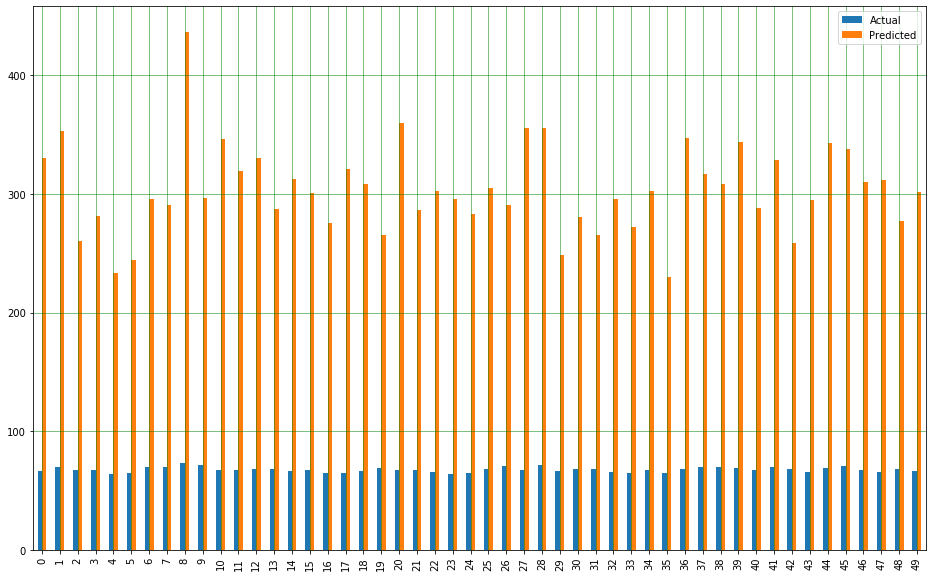

In [46]:
df4 = df3.head(50)
df4.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

no need to perform any further tests, it is very evident this performed badly